# Predicting heart disease using machine learning

This notebook looks into using varius Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting weather or not someone has heart disease based on their medical attributes 
 
 
We are going to take the following aproach :
1. Problem definition 
2. Data
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition
>Given clinical parameters about a patient, can we predict weather or not they have heart disease?

## 2. Data
The original data came from the Cleaveland data from the UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/heart+Disease, or kaggle https://www.kaggle.com/ronitf/heart-disease-uci/data?select=heart.csv




## 3. Evaluation 
>if we can reach 95% accuracy at predicting weather or not a patient has a heart disease during the proof of concept, we'll pursue the project 

## 4.Features 
this is where you'll get different information about eavh of he features in your data. 
**Create a data dictionary**


#3 (age)
#4 (sex)
#9 (cp)
#10 (trestbps)
#12 (chol)
#16 (fbs)
#19 (restecg)
#32 (thalach)
#38 (exang)
#40 (oldpeak)
#41 (slope)
#44 (ca)
#51 (thal)
#58 (num) (the predicted attribute)

## Preparing the tools 
Import all the tools 

In [1]:
#import libraries 

#Regular EDA(explratory data analysis) and ploting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import sklearn 
import seaborn as sns 

#models form scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve 


In [2]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

## Load data 

In [3]:
df = pd.read_csv('Data/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape #(rows, columns )

(303, 14)

## Data exploration 

the goal here is to become an expert in the data you are working with 

1. What questions are you trying to solve 
2. what kind of data do we have and how do we treat different types?
3. what is missing from the data and how do we deal with it 
4. where are the outliers and why should we care about it?
5. How can you add, change or remove features to get mpre out of ypur data?



In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#lest find out how many of each class there is in our data set
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

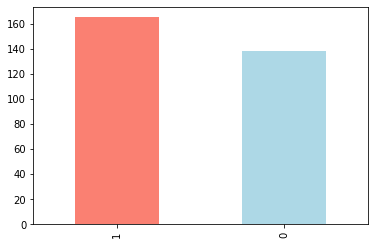

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare taget column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


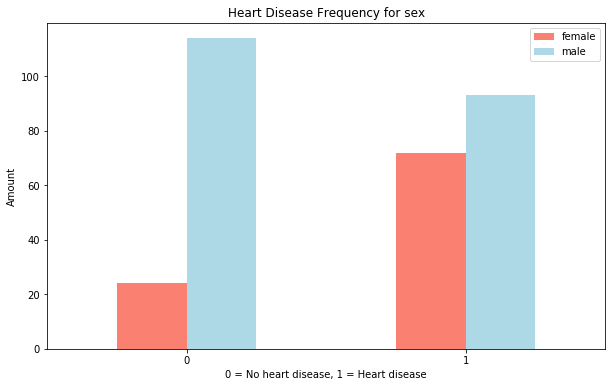

In [14]:
# Create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No heart disease, 1 = Heart disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);
            

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

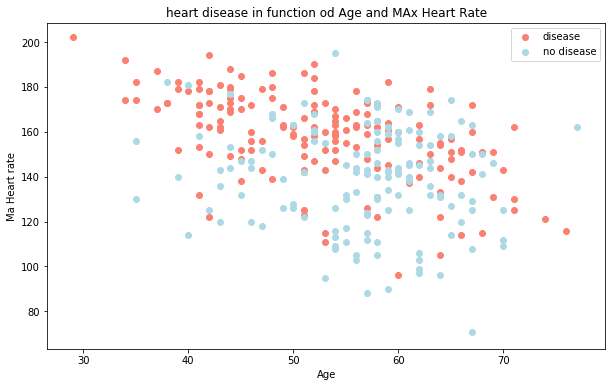

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helpfull info
plt.title("heart disease in function od Age and MAx Heart Rate")
plt.xlabel("Age")
plt.ylabel("Ma Heart rate")
plt.legend(["disease","no disease"]);

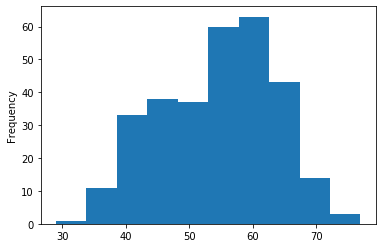

In [18]:
# Check the distribution of the age column with a histogrm 
df.age.plot.hist();

### Heart Disease frequency per Chest Pain Type 

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


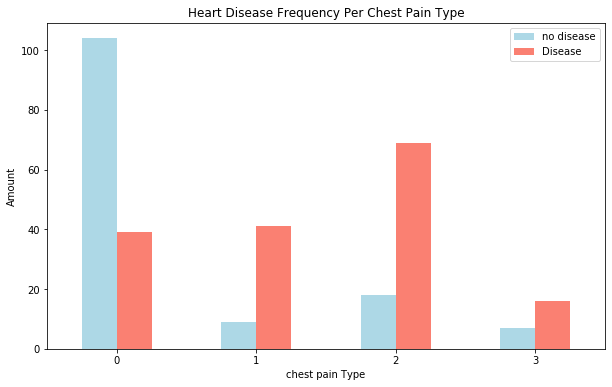

In [20]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                color=["lightblue", "salmon"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("chest pain Type")
plt.ylabel("Amount")
plt.legend(["no disease", "Disease"])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


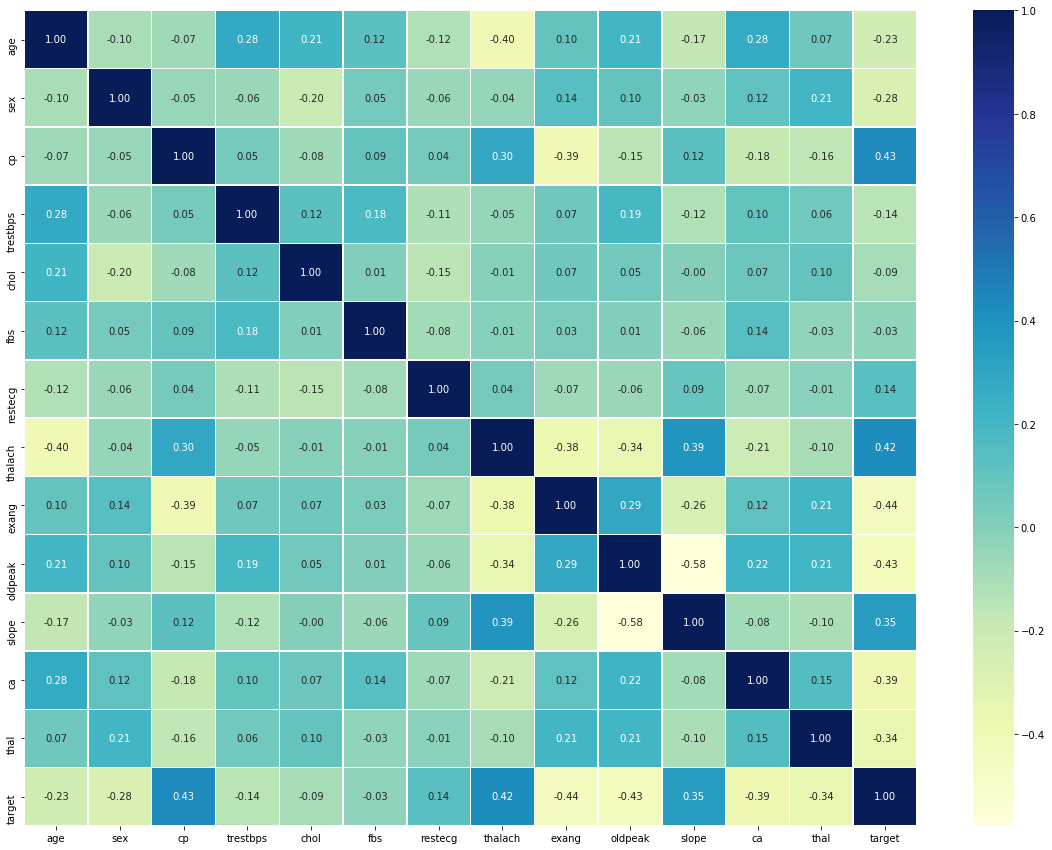

In [23]:
# lets make our correlation matrix  little prettier 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (20, 15))
ax = sns.heatmap(corr_matrix, 
                annot=True,  
                linewidths= 0.5, 
                fmt ='.2f', 
                cmap = 'YlGnBu');


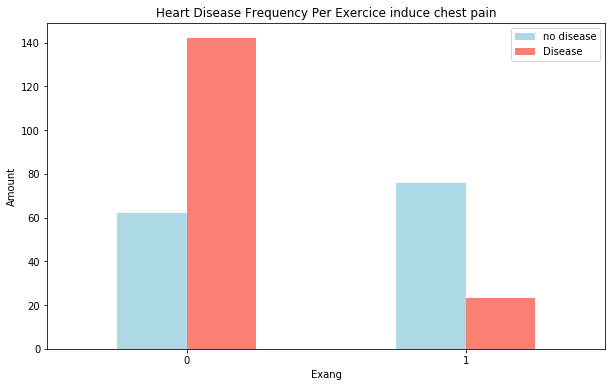

In [24]:
# double check correlations fro Exang  
pd.crosstab(df.exang, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                color=["lightblue", "salmon"])

# Add some communication
plt.title("Heart Disease Frequency Per Exercice induce chest pain")
plt.xlabel("Exang")
plt.ylabel("Amount")
plt.legend(["no disease", "Disease"])
plt.xticks(rotation=0);

## 5. Modelling

In [25]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Split data into X and y 
X =  df.drop("target", axis=1)
y = df["target"]


In [27]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)


In [30]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into train and test set its time to build our machine learning model. 
We'll train it (find the patterns) on the training set.
We'll test it (use the patterns) on the teest set.

we are going to try 3 differnet machine learning models :
1. Logistic Regression 
2. K-nearest neighbour calssifier 
3. Random forest classifier 

In [32]:
# looking for the right model 
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

#create a function to fit andscore models 

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalueats given machine learning models.
    models: a dict of different SCikit-learn machine learning models 
    X_train : trainig data (no labesl )
    X_test: testing data (no labels)
    y_train: training labesl 
    y_test: test labels 
    """
    #set random seed 
    np.random.seed(42)
    #Make a dictionary  to keep models scorees 
    model_scores= {}
    #loop throug models 
    for name, model in models.items():
        #fit the modelto data 
        model.fit(X_train, y_train)
        #Evaluate the modeland append its score to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores




In [34]:
models_score = fit_and_score(models= models, 
                            X_train = X_train,
                            X_test = X_test, 
                            y_train = y_train, 
                            y_test = y_test)
models_score

C:\Users\Owner\Desktop\Machine_learning\project_mileston1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision 

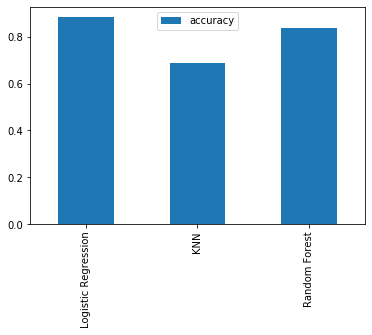

In [37]:
model_compare = pd.DataFrame(models_score, index=['accuracy'])
model_compare.T.plot.bar();

Now we've got a basseline model ... and we know a model's first predictions and allway what we should we based our next steps of.

Let's look at following:
* Hypperparameter tuning
* feature importance
* confusion matrix
* cross-vallidation
* precission
* recall
* F1 score
* classification report
* ROC curve 
* area under the  curve(AUC)

## Hyper parameter tuning

In [40]:
# lets's tune KNN

train_scores =[]
test_scores = []

# Create a list of different values for n_neigbhours
neighbors =  range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighboours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test score list
    test_scores.append(knn.score(X_test, y_test))
    




In [41]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data:  75.41%


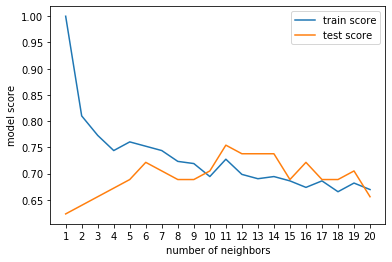

In [44]:
plt.plot(neighbors, train_scores, label="train score")
plt.plot(neighbors, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"maximum KNN score on the test data: {max(test_scores)*100: .2f}%")


## Hyperparameters tuning with RandomizedSearchCV

we are going to tune:
* Logistic Regession()
* RandomForestClassifier
... using RandomizedSearchCV

In [56]:
# Cratete a hyperparameter grid for LogisticRegression 
log_reg_grid = {'C':np.logspace(-4, 4, 20), 
               'solver': ['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier 

rf_grid = {'n_estimators':np.arange(10, 1000, 50), 
          'max_depth': [None, 3, 5, 10], 
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids ste up for each of our models let's tune them with randomized searchCV

In [57]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit radnom hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [59]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

noow we've tuned LOgisticRegression() let's do the same for random forest classifier 

In [62]:
# setup random seed
np.random.seed(42)

#Setup random parameter for RandomForestClassifier()

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions =rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit radom hyperparameter search model for RandomForrestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [63]:
# Find the hyper parameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [64]:
# Evaluate the randomized search Random Forest Classifier model 
rs_rf.score(X_test, y_test)

0.8688524590163934

In [67]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

 Ways to tun hyperparameters

1. by hand
2. RandomizedSearchCV
3. GridSearch

## Hyperparameter Tuning with GridSearchCV

since our LogisticRegresion model provides the best scores we will use GridSearchCV to imptove it 

In [68]:
#Deifferent hyperparamters for our logisticRegerssion model 
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}
#setup grid hyperparameter seach for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid, 
                         cv= 5, 
                         verbose = True)

#fit grid hyperparameter search model 

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.3s finished


In [69]:
# chek the best hyperparamete
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [70]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evauating our tuned machine learning classifier beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* F1-score
(cros validation if possible)

t make comparison and evaluate trained model, first we need to make predictions

In [72]:
# Make predictions with tuned model 
y_preds = gs_log_reg.predict(X_test)

In [73]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [76]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

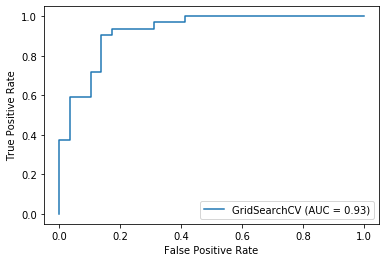

In [77]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [78]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


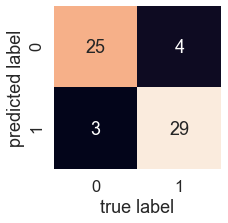

In [82]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """ Plots an nice looking confucion matrix using Seaborn's heatmap()
    """
    fig, ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat( y_test, y_preds)

now we've got a ROC and AUC and  aconfusino atrix, lets geta a classification repport as well as a cross-validated precision, recall and f1 score


In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using cross-validation 

we're going to calculate precision, recall and f1 scores using cross-validation 

In [84]:
#check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [85]:
#create a new classifier with best paraeteres 
clf = LogisticRegression (C =  0.20433597178569418, 
                         solver = 'liblinear')

In [86]:
#cross-validates accuracy 
cv_acc = cross_val_score(clf, 
                        X, 
                        y, 
                        cv = 5, 
                        scoring= 'accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [89]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [90]:
cv_precision = cross_val_score(clf, 
                        X, 
                        y, 
                        cv = 5, 
                        scoring= 'precision')

cv_precision = np.mean(cv_precision)
cv_precision


0.8207936507936507

In [93]:
cv_recall = cross_val_score(clf, 
                        X, 
                        y, 
                        cv = 5, 
                        scoring= 'recall')

cv_recall = np.mean(cv_recall)
cv_recall


0.9212121212121213

In [94]:
cv_f1 = cross_val_score(clf, 
                        X, 
                        y, 
                        cv = 5, 
                        scoring= 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1


0.8673007976269721

In [96]:
# create a plot 
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 
                          'Precision': cv_precision, 
                          'Recall': cv_recall,
                          'F1':cv_f1}, 
                         index=[0])

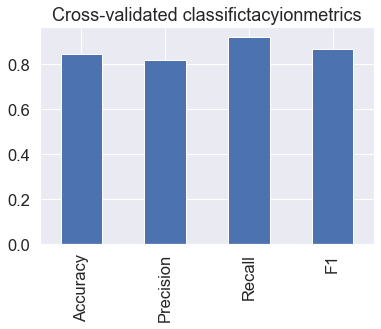

In [98]:
cv_metrics.T.plot.bar(title = 'Cross-validated classifictacyionmetrics', legend = False);

### Feature importance
Feature importance is another way of asking , "Which features contribute most to the outcomes of the model and how did they contribute?"

Finding feature importance is differenet for each machine learning model. One way to find feature importace is to search for "(model name) feature importance"

Let's find feature importance for pur Lpgistic Regression model


In [102]:
# Fit an instance of Logistic Regression 
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
# Check coef_ (coeficient)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [104]:
# Match the coef's of features to columns
feature_dict =  dict(zip(df.columns, list(clf.coef_[0])))

In [105]:
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

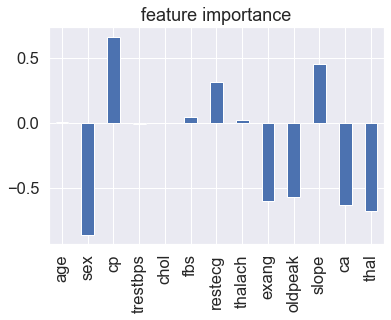

In [107]:
# Visualise feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="feature importance", legend=False);

In [109]:

pd.crosstab(df["sex"], df["target"]) #look at the ratio

target,0,1
sex,,
0,24,72
1,114,93


In [110]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6.Experimentation

if you haven't hit your evaluation metric yet... ask ypurself...

* Could you collect more data?
* Could you try a better model? CatBoost, XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hut ypure evaluation metric) how would ypu export it and share it with others?



